In [2]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
file_path =r"C:\Users\satvi\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv"

In [6]:
import pandas as pd

file_path = r"C:\Users\satvi\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_130083\API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv"

data = pd.read_csv(file_path, skiprows=4)

print(data.head())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130075728.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2016         2017         2018         2019  \
0      58190.0  .

In [7]:
import pandas as pd

file_path = r"C:\Users\satvi\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_130083\API_SP.POP.TOTL_DS2_en_csv_v2_130083.csv"
data = pd.read_csv(file_path, skiprows=4)

countries = data[~data['Country Code'].str.startswith('A') & ~data['Country Code'].str.startswith('E')]

year = '2023'
pop_data = countries[['Country Name', year]].dropna()

pop_data.head()


,Country Name,2023
16,Burundi,13689450.0
17,Belgium,11787423.0
18,Benin,14111034.0
19,Burkina Faso,23025776.0
20,Bangladesh,171466990.0


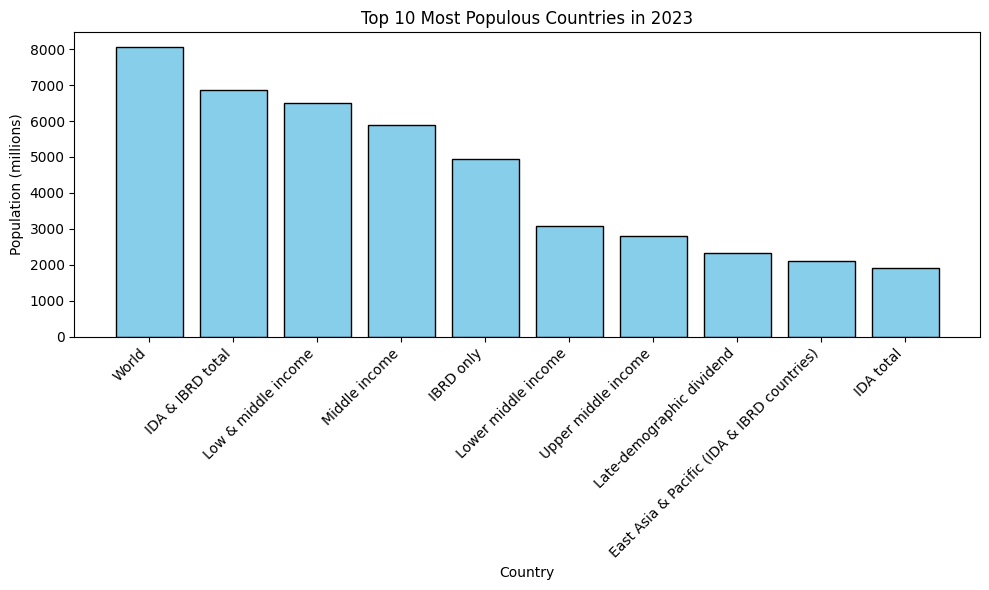

In [8]:
import matplotlib.pyplot as plt
top10 = pop_data.sort_values(by=year, ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(top10['Country Name'], top10[year]/1e6, color='skyblue', edgecolor='black')
plt.xlabel("Country")
plt.ylabel("Population (millions)")
plt.title(f"Top 10 Most Populous Countries in {year}")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

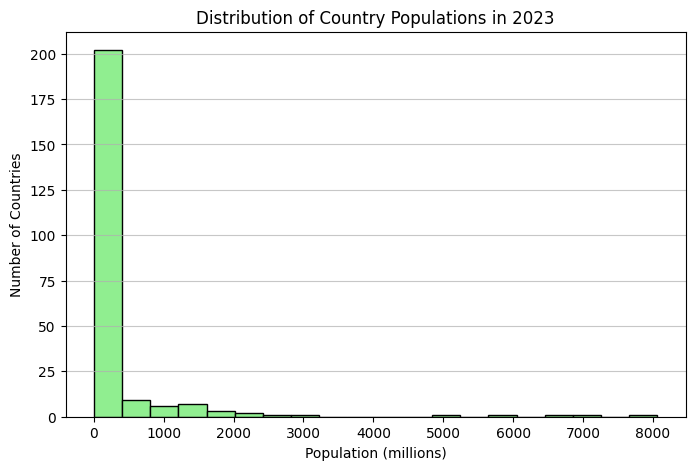

In [9]:
plt.figure(figsize=(8,5))
plt.hist(pop_data[year]/1e6, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel("Population (millions)")
plt.ylabel("Number of Countries")
plt.title(f"Distribution of Country Populations in {year}")
plt.grid(axis='y', alpha=0.7)
plt.show()

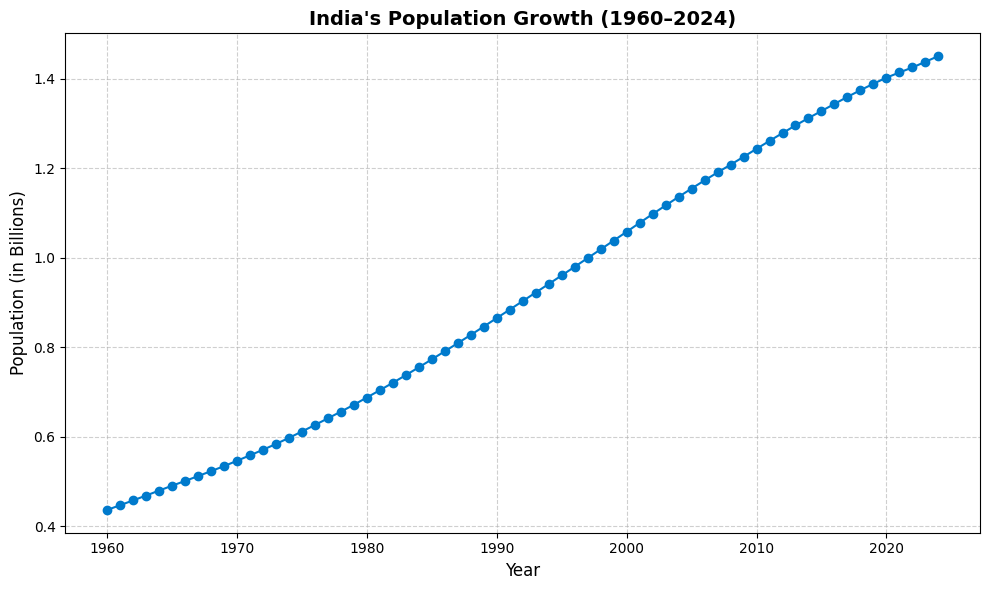

In [10]:
india_data = data[data['Country Name'] == 'India'].iloc[0, 4:-1]  # all year columns except metadata

years = india_data.index.astype(int)
population = india_data.values.astype(float) / 1e9  # Convert to billions

plt.figure(figsize=(10,6))
plt.plot(years, population, marker='o', color='#007acc')
plt.title("India's Population Growth (1960–2024)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population (in Billions)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
